In [1]:
import warnings
warnings.filterwarnings("ignore", message="""No negative samples in targets, false positive value 
                            should be meaningless. Returning zero tensor in false positive score""")

warnings.filterwarnings("ignore", message="""No positive samples in targets, true positive value 
                            should be meaningless. Returning zero tensor in true positive score""")

warnings.filterwarnings("ignore", message="""UserWarning: Average precision score for one or more 
                            classes was `nan`. Ignoring these classes in average""")
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")

warnings.filterwarnings("ignore", message="""UserWarning: Average precision score for one or more
                            classes was `nan`. Ignoring these classes in average""")

import logging
logging.getLogger("lightning").setLevel(logging.ERROR)

In [55]:
import sys
sys.path.insert(0, "../data")
sys.path.insert(0, "../utils")

import math
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

from datetime import datetime
from matplotlib import cm
from tqdm.notebook import trange, tqdm
from skimage import io, transform

import torch
import torchvision
import pytorch_lightning as pl
import tensorflow as tf
import sklearn
from sklearn import metrics, model_selection
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.utils.data import random_split
from torchvision import transforms, utils
from torchvision.datasets import MNIST
from torchmetrics.functional import accuracy, average_precision, auroc, roc, confusion_matrix
from torchmetrics.utilities.data import to_categorical
from pytorch_lightning.loggers import TensorBoardLogger

import importlib

import Datasets
import util_functions
import functions_markov
import UltrametricTree
importlib.reload(Datasets)
importlib.reload(util_functions)
importlib.reload(functions_markov)
importlib.reload(UltrametricTree)
from Datasets import MnistLinearDataset, UltrametricMnistDataset
from Datasets import MnistPredictDataset, UltraMetricSampler, BinarySampler
from functions_markov import generate_markov_chain
from util_functions import one_hot_labels, plot_to_image, plot_confusion_matrix
from UltrametricTree import SynthUltrametricTree


ModuleNotFoundError: No module named 'Datasets'

for i in range(2):
    #print(um_train_ds[i])
    plt.imshow(um_train_ds[i][0].reshape(28,28))
    plt.show()
    print(um_train_ds[i][1], "ee ", chain[i])
    print("TEST")
    plt.imshow(test_ds[i][0].reshape(28,28))
    plt.show()
    print(test_ds[i][1])


In [8]:
dataset = 'synth' # 'mnist'
input_size = 2000 #28*28
max_tree_depth = 6
total_sample_nb = 2000000 # 5000000
nb_classes = 2**max_tree_depth
classes = np.arange(0, nb_classes)
noise_level = 20
p_flip = 0.1

n_epochs = 70
batch_size_train = 128
batch_size_test = 1000
learning_rate = 0.001
hidden_size = 1000

random_seed = 1
torch.manual_seed(random_seed)


In [9]:
#for mode in ['um', 'rand', 'split']:
# Lightning
mode='rand'
if dataset == 'mnist':
    data_module = MnistDataModule("../data/", mode=mode, 
                              normalization_transform=transforms.Normalize((0.1307,), (0.3081,)))
elif dataset == 'synth':
    data_module = SynthDataModule("../data/", mode=mode, leaf_length=input_size, 
                                  batch_size_train=batch_size_train, batch_size_test=batch_size_test, 
                                  num_workers=4, max_depth=max_tree_depth, noise_level=noise_level, p_flip=p_flip)
    
# model
model = FFNetwork(input_size, hidden_size, learning_rate, nb_classes, mode=mode)
logger = TensorBoardLogger("tb_logs", name="my_model")

# training
trainer = pl.Trainer(gpus=0, num_nodes=1, precision=32, 
                     logger=logger, max_epochs=n_epochs,
                     reload_dataloaders_every_n_epochs=0) #, fast_dev_run=4)
trainer.fit(model, data_module)

    

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name    | Type    | Params
------------------------------------
0 | l1      | Linear  | 2.0 M 
1 | relu    | ReLU    | 0     
2 | l2      | Linear  | 64.1 K
3 | softmax | Softmax | 0     
------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.260     Total estimated model params size (MB)


(1280, 2000)


Validation sanity check: 0it [00:00, ?it/s]

/Users/jeromjeromee/opt/anaconda3/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (9) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [7]:
preds = trainer.predict(model, predict_loader)

NameError: name 'predict_loader' is not defined

In [ ]:
#print(preds[0])
preds_binary = to_categorical(preds[0], argmax_dim=1)

In [ ]:
preds_binary

In [ ]:
correct=[el[0] for el in filtered_test_df["label_int"].to_numpy().tolist()]

In [ ]:
torch.tensor(correct[:64])

In [ ]:
labels = np.arange(0,3,1)
np.array([[el]*3 for el in labels]).flatten()

In [7]:
a,b =zip([1,1,1],[2,2,2])

ValueError: too many values to unpack (expected 2)

In [8]:
a

(1, 2)

In [20]:
from datetime import datetime
from time import time
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y_%H:%M:%S")
dt_string

'22/03/2022_11:54:18'

In [29]:
!ls ../logs/my_model_synth/version_0/events.out.tfevents.1647966344.MacBook-Pro-de-Jerome.local.2588.0



../logs/my_model_synth/version_0/events.out.tfevents.1647966344.MacBook-Pro-de-Jerome.local.2588.0


[0.742710292339325, 0.7433669567108154]


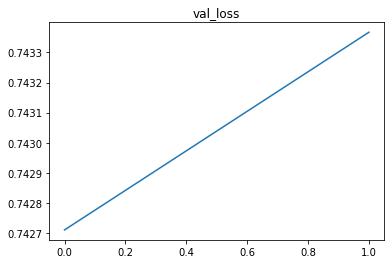

[0.0, 0.0]


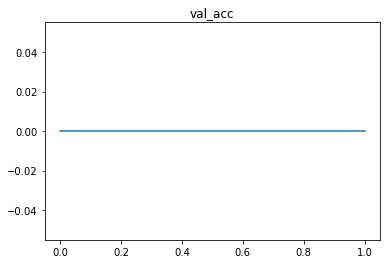

[0.1428571492433548, 0.1428571492433548]


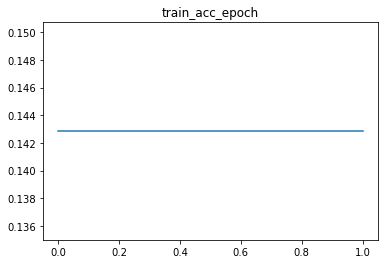

# 